In [1]:
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import nltk


In [3]:
data=pd.read_csv('/content/sample_data/Tweets.csv')

In [4]:
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [5]:
data.shape

(14640, 15)

In [6]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


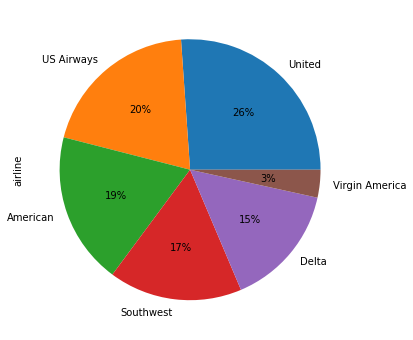

In [8]:
data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).

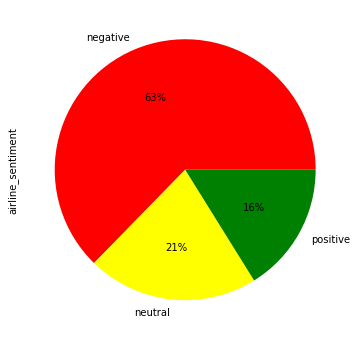

In [9]:
data.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])


From the output, you can see that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

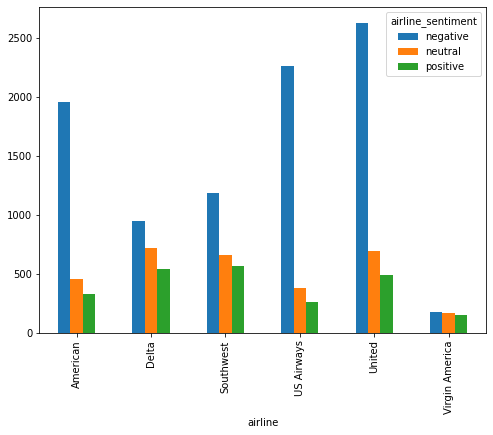

In [10]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

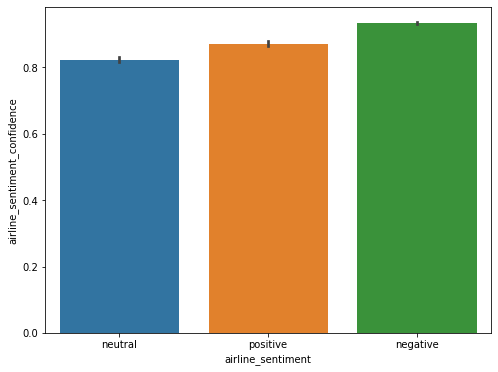

In [11]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=data)

From the output, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

In [12]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [13]:
data=data.drop("airline_sentiment_gold",axis=1)
data=data.drop("negativereason_gold",axis=1)
data=data.drop("tweet_coord",axis=1)

In [14]:
import nltk 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
tweets=data.text

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [17]:
#converting to lower case
data["text"] = data["text"].apply(lambda x: x.lower()) 
#removing everything instead of 0-9, a-z, A-Z
data["text"] = data["text"].apply(lambda x: re.sub("[^0-9a-zA-Z]"," ", x))
#removing html tags
clean_html = re.compile('<.*?>')
data["text"] = data["text"].apply(lambda x: re.sub(clean_html, "", x))
#lemmatizing
data["text"] = data["text"].apply(lambda x: lemmatizer.lemmatize(x))
#removing extra white spaces
data["text"] = data["text"].apply(lambda x: re.sub(" +"," ", x) )

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True,strip_accents='ascii', stop_words=stop_words)

In [19]:
X = vectorizer.fit_transform(data["text"])

In [20]:
y=data['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)
ypred

array([1, 0, 0, ..., 0, 1, 0])

In [23]:
classifier.score(X_train,y_train)

0.8875512295081968

In [24]:
classifier.score(X_test,y_test)

0.8258196721311475

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.8258196721311475

In [27]:
lr_accuracy = accuracy*100
lr_accuracy

82.58196721311475

In [28]:
confusion_matrix(y_test,ypred)

array([[1725,  164],
       [ 346,  693]])

In [29]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.81      0.67      0.73      1039

    accuracy                           0.83      2928
   macro avg       0.82      0.79      0.80      2928
weighted avg       0.82      0.83      0.82      2928



In [30]:
# Logistic Regression With Hyper parameter tuning

from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_values = ['l1', 'l2', 'elasticnet', 'none']
parameters = {'solver':solver_values , 'penalty': penalty_values }

In [31]:
linear_classifier = GridSearchCV(classifier, parameters)
linear_classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
linear_classifier.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
linear_classifier.best_params_

{'penalty': 'l2', 'solver': 'saga'}

In [34]:
linear_classifier_final = LogisticRegression(penalty = 'l2',solver='saga')
linear_classifier_final.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred=linear_classifier_final.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1725,  164],
       [ 345,  694]])

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8261612021857924

In [38]:
# Ridge Classifier

from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_classifier = GridSearchCV(ridge, parameters)
ridge_classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
ridge_classifier.best_params_

{'alpha': 5}

In [40]:
ridge_classifier = RidgeClassifier(alpha=5)

ridge_classifier.fit(X_train,y_train)

RidgeClassifier(alpha=5, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [41]:
y_pred_ridge=ridge_classifier.predict(X_test)

In [42]:
confusion_matrix(y_test,y_pred_ridge)

array([[1751,  138],
       [ 356,  683]])

In [43]:
accuracy = accuracy_score(y_test,y_pred_ridge)
accuracy

0.8312841530054644

In [44]:
rc_accuracy = accuracy*100 
rc_accuracy

83.12841530054644

In [45]:
# Random Forest Classifier

from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier()

In [46]:
n_estimators=[25,50,75,100] 
criterion=['gini','entropy'] 
max_depth=[3,5,10] 
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth} 
RFC_cls = GridSearchCV(cls, parameters)
RFC_cls.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [47]:
RFC_cls.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 25}

In [48]:
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=25,criterion='gini',max_depth=10)

In [49]:
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
y_pred=cls.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1889,    0],
       [1023,   16]])

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6506147540983607

In [53]:
rfc_accuracy = accuracy*100
rfc_accuracy

65.06147540983606

In [54]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.81      0.67      0.73      1039

    accuracy                           0.83      2928
   macro avg       0.82      0.79      0.80      2928
weighted avg       0.82      0.83      0.82      2928



In [55]:
# XG Boost


import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[1739  150]
 [ 487  552]]


0.7824453551912568

In [57]:
xg_accuracy = accuracy*100
xg_accuracy

78.24453551912568

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 76.86 %


In [59]:
# XG Boost Hyperparameter Tuning

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [60]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=5000, early_stopping_rounds=5, metrics="error", as_pandas=True, seed=123)

In [61]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.299044,0.004066,0.304713,0.003920
1,0.296380,0.009407,0.305806,0.009204
2,0.305464,0.010284,0.315096,0.006701
3,0.301981,0.008239,0.305601,0.011869
4,0.305977,0.010182,0.310382,0.008857
5,0.299385,0.008352,0.302869,0.005470
6,0.301093,0.011068,0.304577,0.009227
7,0.294877,0.011103,0.299112,0.012211
8,0.294570,0.010756,0.299112,0.012123
9,0.294536,0.009673,0.296107,0.008043


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameters={"objective":["binary:logistic"],'colsample_bytree': [0.3],'learning_rate': [0.1],
                'max_depth': [5], 'alpha': [10],'n_estimators':[6]}

In [64]:
xgb_final = GridSearchCV(classifier, parameters)
xgb_final.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [10], 'colsample_bytree': [0.3],
                         'learning_rate': [0.1], 'max_depth': [5],
                         'n_estimators':

In [65]:
xgb_final.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgb_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
accuracy

[[1798   91]
 [ 769  270]]


0.7062841530054644

In [67]:
xght_accuracy = accuracy*100
xght_accuracy

70.62841530054644

In [68]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [69]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
y_pred=cls.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6506147540983607

In [72]:
NB_accuracy = accuracy*100
NB_accuracy

65.06147540983606

In [73]:
# SMOTE

from sklearn.model_selection import RandomizedSearchCV, KFold
kf = KFold(n_splits = 10, shuffle = True)

In [74]:
params = {'C':[0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10, 20, 50],
          'tol':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

In [75]:
cls = LogisticRegression()

In [76]:
search = GridSearchCV(cls, params, cv = kf.split(X, y), n_jobs = -1, scoring = 'f1')

In [77]:

search.fit(X, y)


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f09d786f938>,
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1, 2, 3, 4, 5, 10,
                               20, 50],
                         'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [78]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

In [79]:
model_LR = search.best_estimator_

In [80]:
model_LR.fit(X_res, y_res)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [81]:
y_pred5 = model_LR.predict(X_test)

In [84]:
pred = model_LR.predict(X_test)

In [85]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred5)

0.7612719506407214

In [86]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.8282103825136612

In [87]:
smote_accuracy = accuracy*100
smote_accuracy

82.82103825136612

In [93]:
#SVC - Supoprt Vector Classifier

from sklearn.svm import SVC  
cls=SVC()

In [94]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf']}

In [95]:
grid=GridSearchCV(cls, parameters,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
#to get the best parameter for the model
grid.best_params_


{'kernel': 'rbf'}

In [97]:
svclassifier=SVC(C=10,gamma=0.1,kernel='rbf',probability=True)
svclassifier.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [98]:
ypred=svclassifier.predict(X_test)

In [99]:
#accuracy

accuracy= accuracy_score(y_test,ypred)
accuracy

0.8230874316939891

In [100]:
svc_accuracy = accuracy*100
svc_accuracy

82.30874316939891

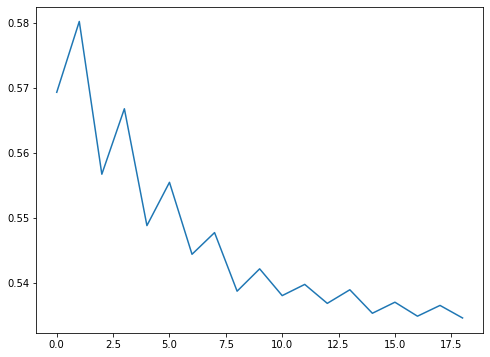

In [92]:
#KNN Classsifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

score = []
for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_res, y_res)
  y_pred = knn.predict(X_test)
  score_1 = f1_score(y_test, y_pred)
  score.append(score_1)
plt.plot(score)
plt.show()


In [101]:
n_classifier = KNeighborsClassifier(n_neighbors=3)
n_classifier.fit(X_train,y_train)
y_pred_KNN=n_classifier.predict(X_test)


In [102]:
#accuracy
accuracy = accuracy_score(y_test,y_pred_KNN)
accuracy

0.7336065573770492

In [103]:
knn_accuracy = accuracy*100
knn_accuracy

73.36065573770492



lr_accuracy = 82.58196721311475

rc_accuracy = 83.12841530054644

rfc_accuracy = 65.06147540983606

xg_accuracy = 78.24453551912568

xght_accuracy = 70.62841530054644

NB_accuracy = 65.06147540983606

smooth_accuracy = 82.82103825136612

svc_accuracy = 82.30874316939891

knn_accuracy = 73.36065573770492

From these we can conclude that Ridge Classifier have better result of 83% accuracy